# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 6 </span>
### Esercizio 6.1

Lo scopo di questo esercizio è di simulare il <b>modello di Ising</b> in una dimensione per diversi valori della temperatura. Consideriamo quindi una catena di $N$ spin con condizioni periodiche al contorno e con interazione primi vicini, la cui Hamiltoniana $H$ è data da

$$ H =  -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})$$

dove $h$ è il campo magnetico esterno, mentre $J$ è una costante di interazione fra gli spin che assumeremo positiva (modello ferromagnetico). D'ora in avanti useremo unità in cui $k_B=1$ e $\mu_B=1$. <br>
Il sistema viene simulato a temperatura costante nell'insieme canonico, in cui la probabilità (non normalizzata) di avere una certa configurazione di spin è data dal peso di Boltzmann $e^{-H/T}$. Il campionamento della distribuzione di Boltzmann avviene tramite due metodi, la cui scelta è governata dalla variabile metro nel file <i>input.dat</i>:

1. algoritmo di <b>Metropolis</b>, quando <b>metro $=1$</b>
2. algoritmo di <b>Gibbs</b>, quando <b>metro $\neq 1$</b>

Le configurazioni di spin campionate ci permettono di calcolare i valori di energia interna per spin $U(N,T)/N$, capacità termica per spin $C(N,T)/N$, suscettibilità magnetica per spin $\chi(N,T)/N$, magnetizzazione per spin $M(N,T)/N$, quest'ultima in presenza di un campo magnetico esterno non nullo. L'esistenza di una soluzione esatta in meccanica statistica del modello di Ising unidimensionale ci consente di confrontare  con la soluzione analitica. <br>

Per eseguire la simulazione è stato utilizzato il codice fornitoci in laboratorio, opportunamente completato: è stato aggiunto il calcolo di tutte le quantità di interesse; è stata aggiunta la possibilità di eseguire il campionamento di Gibbs; infine è stata aggiunta anche la possibilità di ripartire dalla configurazione finale degli spin salvandola nel file <i>config.final</i> (per utilizzare questa configurazione come stato iniziale è necessario porre uguale a 1 la variabile restart in <i>input.dat</i>).

Per la simulazione vengono usati i seguenti parametri:
- $N=50$
- $J=1$
- $T \in [0.5, 2]$
- $h=0$, ad eccezione del calcolo della magnetizzazione in cui $h=0.02$ 

<br> 
Il sistema viene preparato in una configurazione iniziale nella quale gli spin sono determinati casualmente: questo stato senza nessuna correlazione tra gli spin corrisponde a una temperatura $T=\infty$. Dato che simuleremo il sistema a una temperatura finita, la prima fase è quindi l'<b>equilibrazione</b>: vengono eseguiti $300$ step dell'algoritmo in cui viene monitorata l'energia interna per spin per diversi valori della temperatura. Il sistema sarà equilibrato quando l'energia comincerà ad oscillare attorno al suo valore medio. Di seguito vengono riportati i test eseguiti per entrambi gli algoritmi alle temperature $0.5$, $1.0$, $1.5$ e $2.0$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

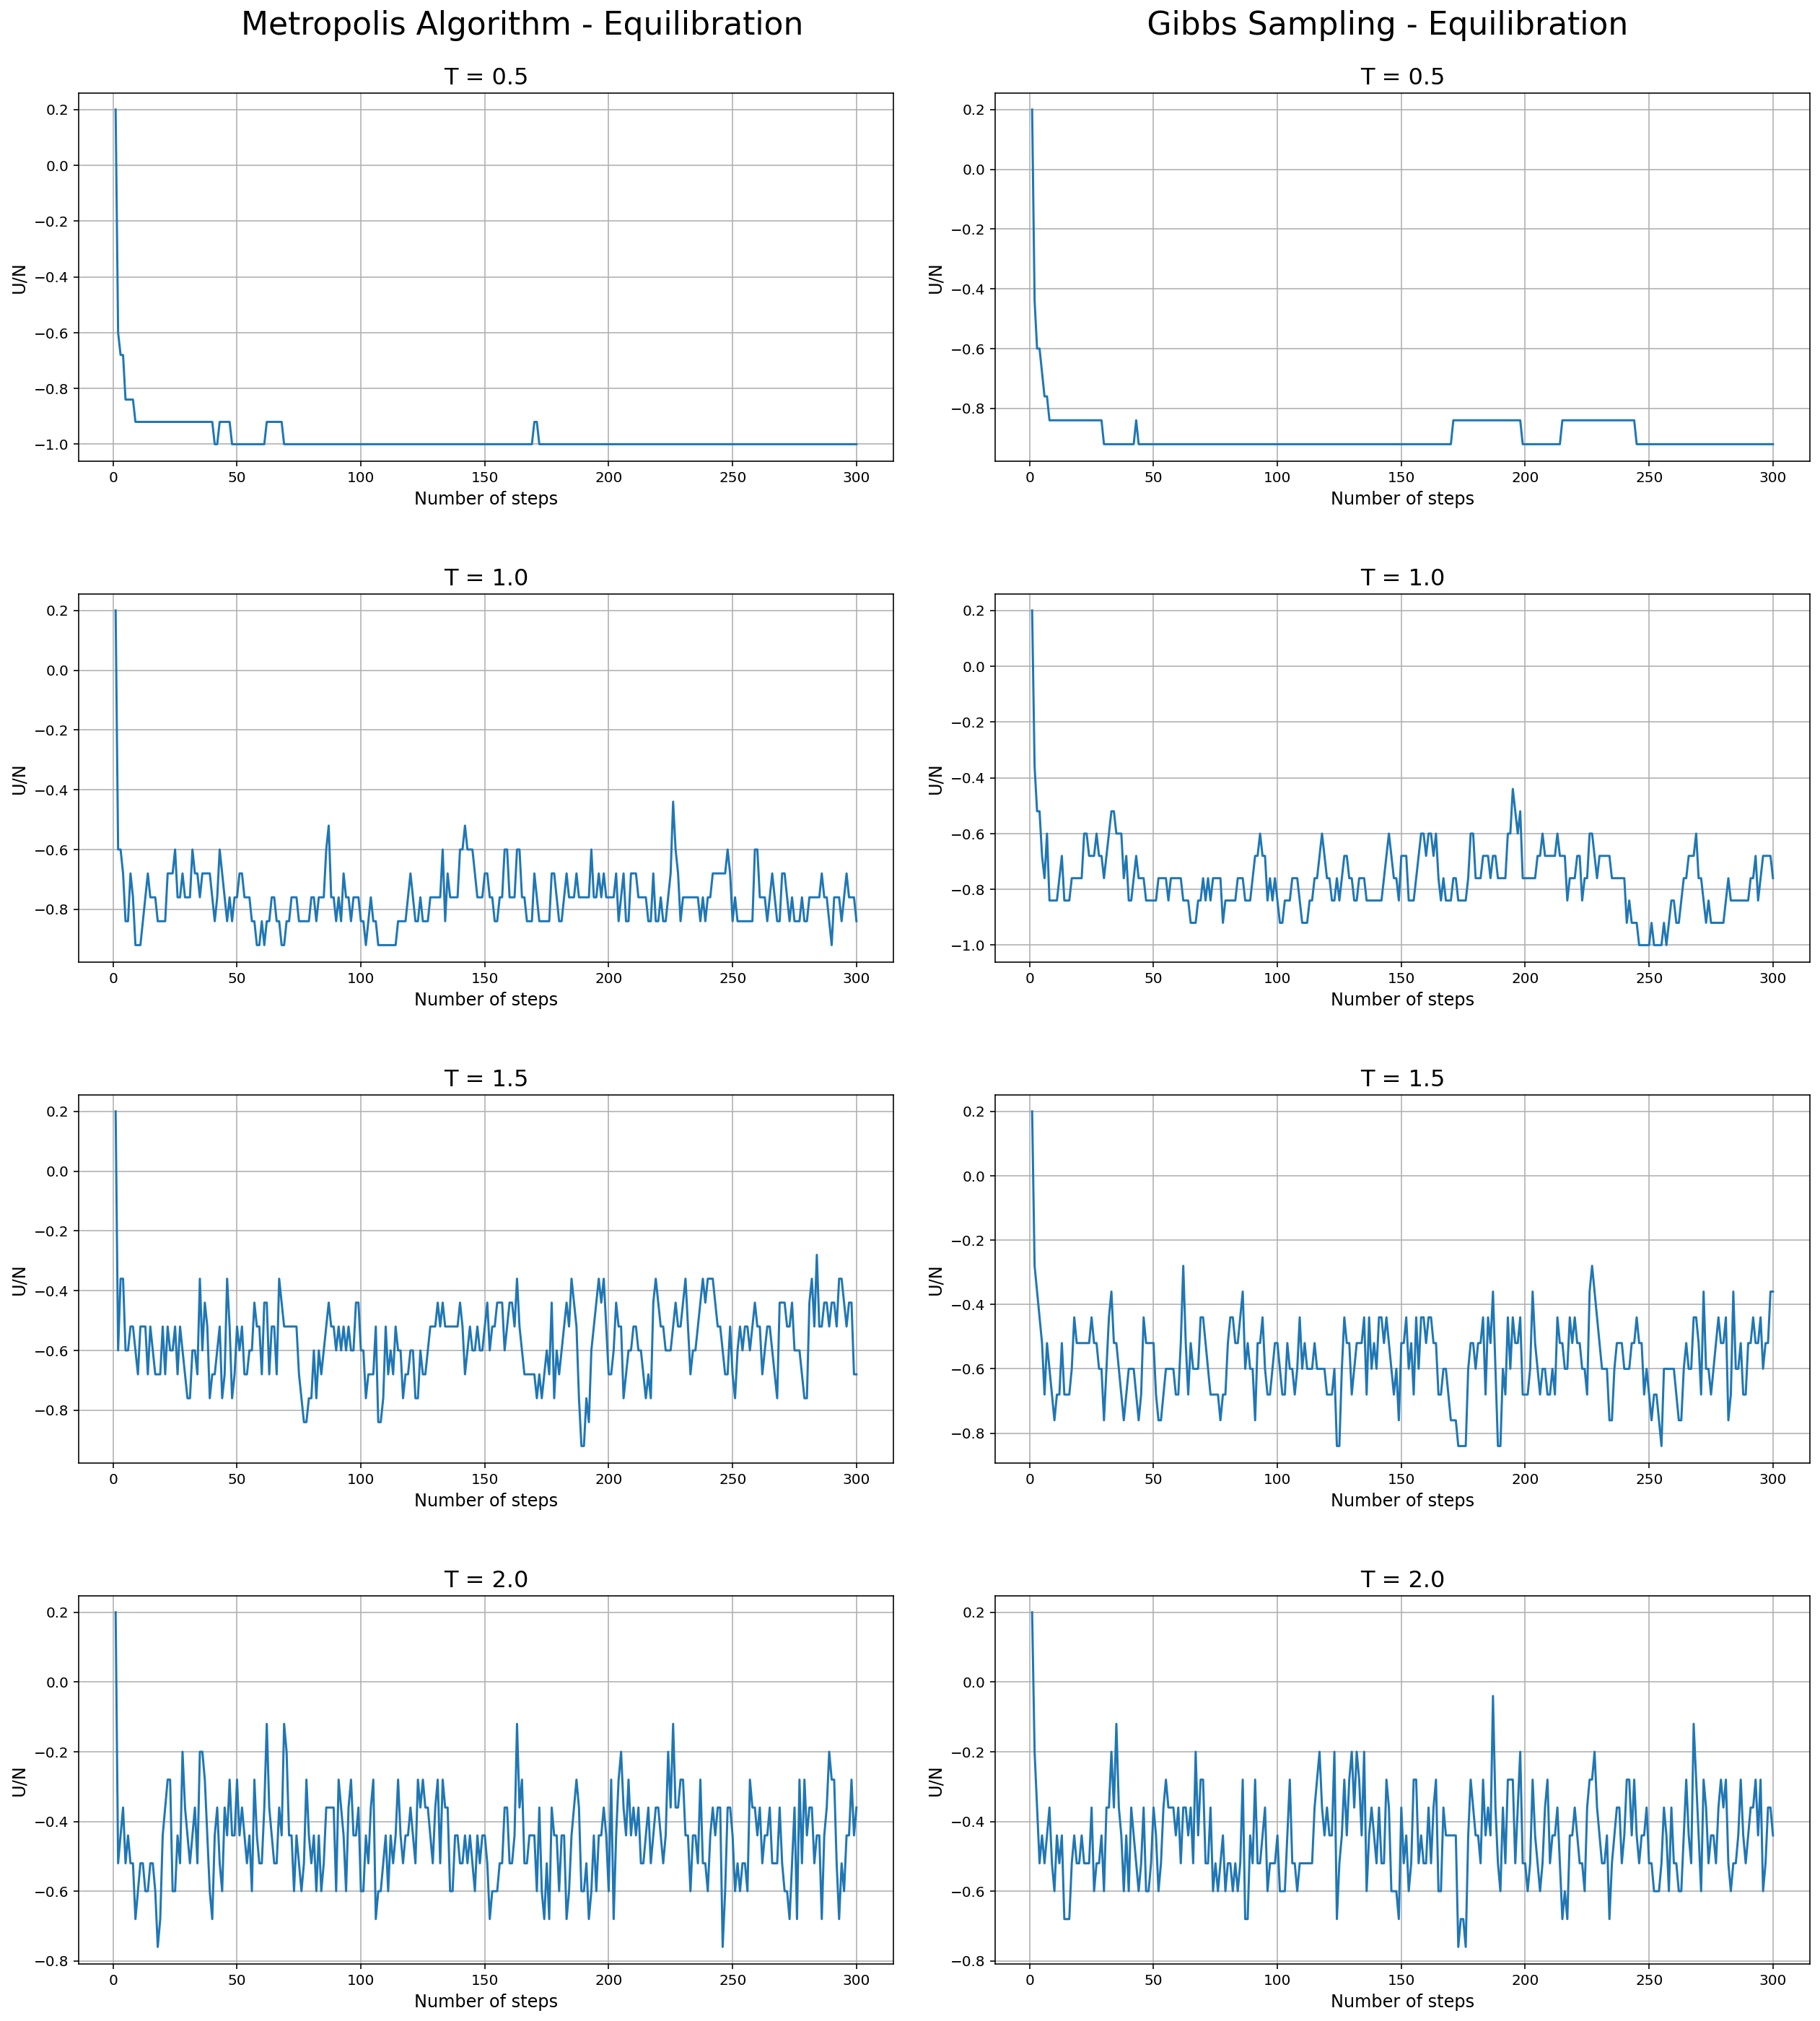

In [2]:
step, M_energy_05 = np.loadtxt("ISING_1D/eq/MTR_eq_0.5.out", usecols = (0,1), delimiter=' ', unpack ='true')
M_energy_1 = np.loadtxt("ISING_1D/eq/MTR_eq_1.out", usecols = (1), delimiter=' ', unpack ='true')
M_energy_15 = np.loadtxt("ISING_1D/eq/MTR_eq_1.5.out", usecols = (1), delimiter=' ', unpack ='true')
M_energy_2 = np.loadtxt("ISING_1D/eq/MTR_eq_2.out", usecols = (1), delimiter=' ', unpack ='true')
G_energy_05 = np.loadtxt("ISING_1D/eq/G_eq_0.5.out", usecols = (1), delimiter=' ', unpack ='true')
G_energy_1 = np.loadtxt("ISING_1D/eq/G_eq_1.out", usecols = (1), delimiter=' ', unpack ='true')
G_energy_15 = np.loadtxt("ISING_1D/eq/G_eq_1.5.out", usecols = (1), delimiter=' ', unpack ='true')
G_energy_2 = np.loadtxt("ISING_1D/eq/G_eq_2.out", usecols = (1), delimiter=' ', unpack ='true')

T_list = [0.5, 0.5, 1.0, 1.0, 1.5, 1.5, 2.0, 2.0]
energy_list = [M_energy_05,  G_energy_05, M_energy_1, G_energy_1, M_energy_15, G_energy_15, M_energy_2, G_energy_2]

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
ax = ax.reshape(-1)
fig.suptitle(f'     Metropolis Algorithm - Equilibration                                  Gibbs Sampling - Equilibration', fontsize=22)
  
for i in range(8):
    ax[i].plot(step, energy_list[i], color='tab:blue')
    ax[i].set_xlabel('Number of steps', fontsize=12)
    ax[i].set_ylabel('U/N', fontsize=12)
    ax[i].set_title(f'T = {T_list[i]}', fontsize=16)
    ax[i].grid(True)
    
    
plt.tight_layout(pad=2.4, w_pad=2.2, h_pad=4.0)
plt.show()

Iniziando da una configurazione iniziale generata casualmente, il sistema presenta un transiente iniziale fino ad arrivare allo stato di equilibrio. Raggiunto l'equilibrio, il sistema inizia a fluttuare attorno all'energia media. Per i valori di temperatura considerati 300 step sono sufficienti per la fase di equilibrazione. Notiamo inoltre che man mano che la temperatura aumenta il tempo di equilibrazione diminuisce: questo ce lo aspettiamo dato che lo stato iniziale è all'equilibrio solo per temperature infinite.

Terminata la fase di equilibrazione si procede con la <b>simulazione</b> del sistema. Viene diviso l'intervallo di temperature $[0.5,2]$ in 60 sottointervalli, simulando quindi le temperature con step di $0.025$; per ogni temperatura si ottiene una stima delle quantità sopra citate con la relativa incertezza statistica tramite il metodo del data blocking. In ogni simulazione a temperatura fissata vengono utilizzati $30$ blocchi con $1.5 \cdot 10^4$ step in ciascuno. Di seguito sono riportati i risultati ottenuti: la prima colonna mostra le quantità misurate tramite i due campionamenti al variare della temperatura insieme al grafico della soluzione analitica; la seconda colonna mostra la differenza fra i valori misurati con i due campionamenti e la soluzione analitica, sempre al variare della temperatura.

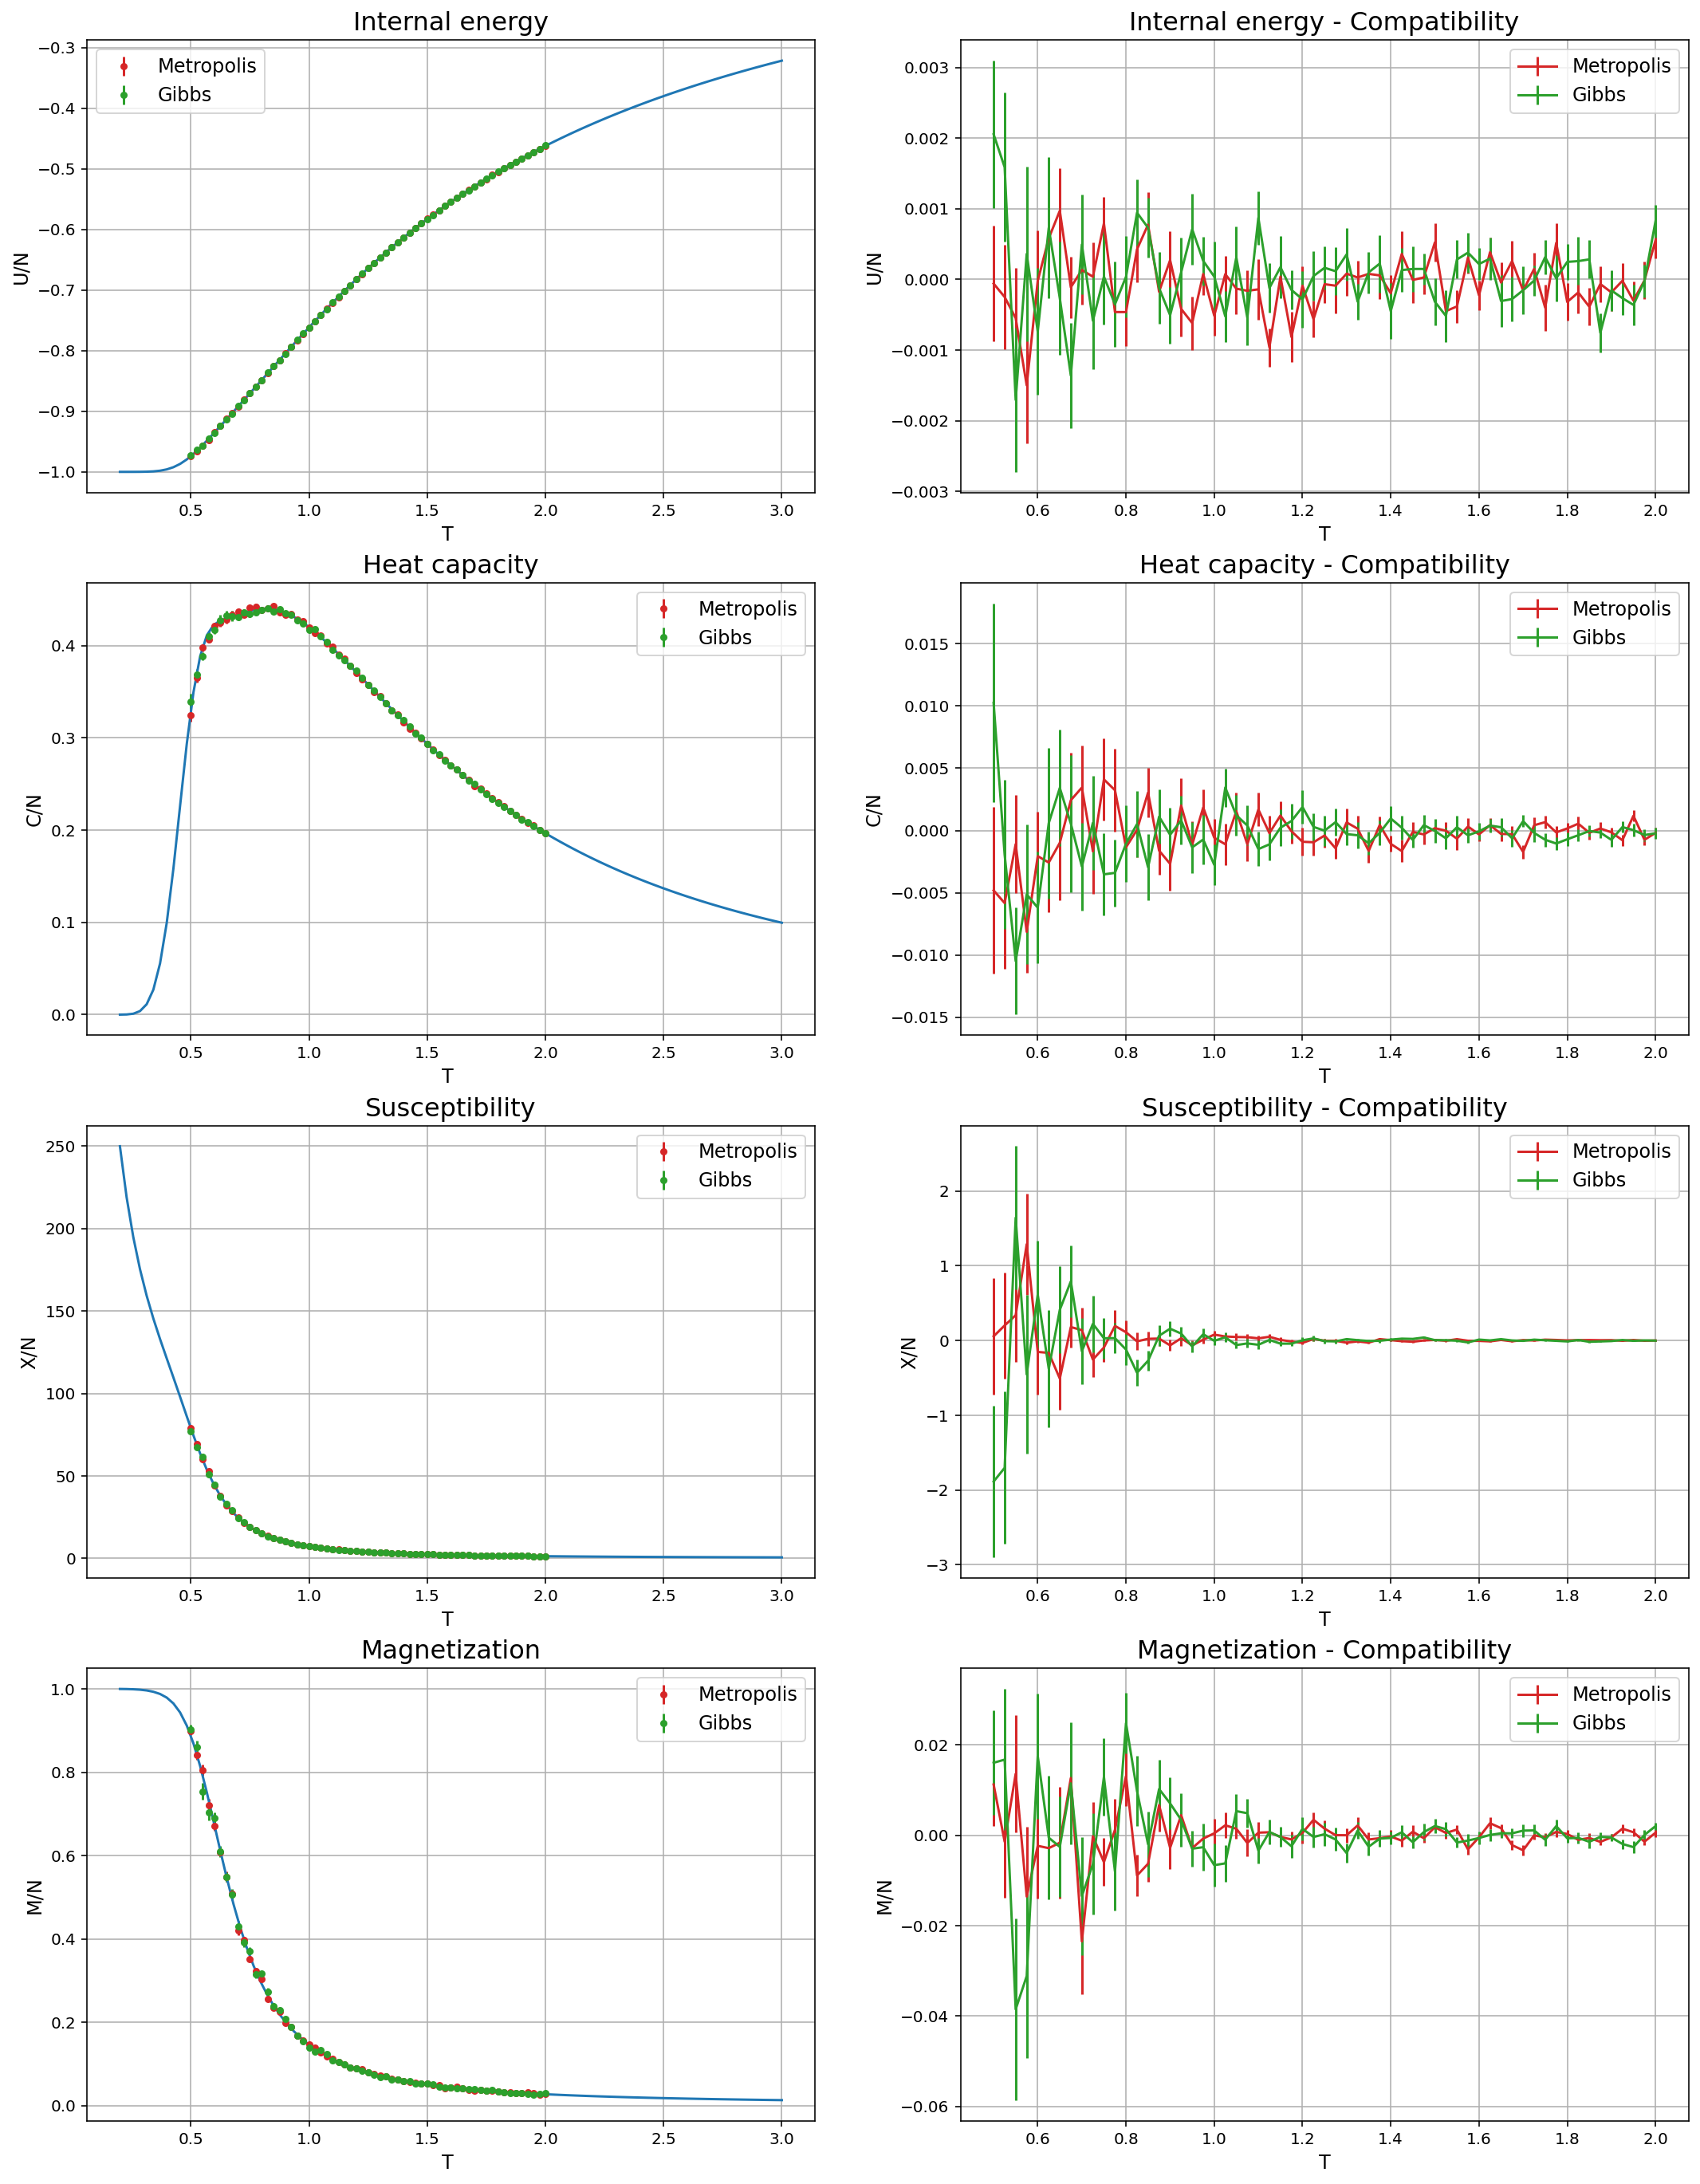

In [3]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

Temp, M_ene, M_err_ene = np.loadtxt("ISING_1D/MTR/ene.out", usecols = (0,1,2), delimiter=' ', unpack ='true')
M_heat, M_err_heat = np.loadtxt("ISING_1D/MTR/heat.out", usecols = (1,2), delimiter=' ', unpack ='true')
M_chi, M_err_chi = np.loadtxt("ISING_1D/MTR/chi.out", usecols = (1,2), delimiter=' ', unpack ='true')
M_mag, M_err_mag = np.loadtxt("ISING_1D/MTR_2/mag.out", usecols = (1,2), delimiter=' ', unpack ='true')

G_ene, G_err_ene = np.loadtxt("ISING_1D/GIBBS/ene.out", usecols = (1,2), delimiter=' ', unpack ='true')
G_heat, G_err_heat = np.loadtxt("ISING_1D/GIBBS/heat.out", usecols = (1,2), delimiter=' ', unpack ='true')
G_chi, G_err_chi = np.loadtxt("ISING_1D/GIBBS/chi.out", usecols = (1,2), delimiter=' ', unpack ='true')
G_mag, G_err_mag = np.loadtxt("ISING_1D/GIBBS_2/mag.out", usecols = (1,2), delimiter=' ', unpack ='true')

b_disc = 1/Temp
th_disc = np.tanh(J/Temp)
thN_disc = th_disc**Ns
ch_disc = 1/th_disc
e_disc = -J*( th_disc + ch_disc*thN_disc )/( 1 + thN_disc )
heat_disc = ((b_disc*J)**2)*(((1+thN_disc+(Ns-1)*(th_disc**2)+(Ns-1)*(ch_disc**2)*thN_disc)/(1+thN_disc))-Ns*((th_disc+ch_disc*thN_disc)/(1+thN_disc))**2)
X_disc = b_disc*np.exp(2*b_disc*J)*(1-thN_disc)/(1+thN_disc)

l1_disc = np.exp(b_disc*J)*np.cosh(b_disc*h)+np.sqrt(np.exp(2*b_disc*J)*np.cosh(b_disc*h)*np.cosh(b_disc*h)-2*np.sinh(2*b_disc*J))
l2_disc = np.exp(b_disc*J)*np.cosh(b_disc*h)-np.sqrt(np.exp(2*b_disc*J)*np.cosh(b_disc*h)*np.cosh(b_disc*h)-2*np.sinh(2*b_disc*J))
Z_disc = l1_disc**Ns + l2_disc**Ns
M_disc= (np.exp(b_disc*J)*np.sinh(b_disc*h)*((l1_disc**(Ns-1))*(1+np.exp(b_disc*J)*np.cosh(b_disc*h)/np.sqrt(np.exp(2*b_disc*J)*np.cosh(b_disc*h)*np.cosh(b_disc*h)-2*np.sinh(2*b_disc*J))) 
        + (l2_disc**(Ns-1))*(1-np.exp(b_disc*J)*np.cosh(b_disc*h)/np.sqrt(np.exp(2*b_disc*J)*np.cosh(b_disc*h)*np.cosh(b_disc*h)-2*np.sinh(2*b_disc*J)))))/(Z_disc)

Title_list = ['Internal energy', 'Internal energy', 'Heat capacity', 'Heat capacity', 'Susceptibility', 'Susceptibility', 'Magnetization', 'Magnetization']
err_list = [M_ene, G_ene, M_heat, G_heat, M_chi, G_chi, M_mag, G_mag]
errbar_list = [M_err_ene, G_err_ene,  M_err_heat, G_err_heat, M_err_chi, G_err_chi, M_err_mag, G_err_mag]
plot_list = [e, e_disc, heat, heat_disc, X, X_disc, M, M_disc]
y_list = ['U/N', 'U/N', 'C/N', 'C/N', 'X/N', 'X/N', 'M/N', 'M/N']

col1_list = [0,2,4,6]
col2_list = [1,3,5,7]

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,24))
ax = ax.reshape(-1)

for i in col1_list:
    ax[i].errorbar(Temp, err_list[i], yerr=errbar_list[i], fmt='.', mew=1.5, label='Metropolis', c='tab:red')
    ax[i].errorbar(Temp, err_list[i+1], yerr=errbar_list[i+1], fmt='.', mew=1.5, label='Gibbs', c='tab:green')
    ax[i].plot(T, plot_list[i], c='tab:blue')
    ax[i].set_xlabel('T ', fontsize=12)
    ax[i].set_ylabel(f'{y_list[i]}', fontsize=12)
    ax[i].set_title(f'{Title_list[i]}', fontsize=16)
    ax[i].legend(loc='best', fontsize=12)
    ax[i].grid(True)
    
for i in col2_list:
    ax[i].errorbar(Temp, err_list[i-1]-plot_list[i], yerr=errbar_list[i-1], label='Metropolis', c='tab:red')
    ax[i].errorbar(Temp, err_list[i]-plot_list[i], yerr=errbar_list[i], label='Gibbs', c='tab:green')
    ax[i].set_xlabel('T', fontsize=12)
    ax[i].set_ylabel(f'{y_list[i]}', fontsize=12)
    ax[i].set_title(f'{Title_list[i]} - Compatibility', fontsize=16)
    ax[i].legend(loc='best', fontsize=12)
    ax[i].grid(True)

plt.show()

In generale c'è una buona compatibilità tra le quantità misurate e i risultati analitici.